In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


df=pd.read_csv("C:/Users/Sri Advikam/Desktop/Amala/Content Monetization Modeler/youtube_ad_revenue_dataset.csv")
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,50:41.0,9936,1221.0,320.0,26497.21418,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,50:41.0,10017,642.0,346.0,15209.74744,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,50:41.0,10097,1979.0,187.0,57332.65850,26.200634,240534,Education,TV,CA,360.134007
3,vid_4078,50:41.0,10034,1191.0,242.0,31334.51777,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,50:41.0,9889,1858.0,477.0,15665.66643,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,50:41.0,9853,1673.0,147.0,42075.70489,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,50:41.0,10128,1709.0,63.0,57563.70304,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,50:41.0,10267,700.0,NaN,27549.71466,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,50:41.0,10240,1616.0,106.0,56967.38438,7.753099,585138,Music,Mobile,UK,351.525811


In [2]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,50:41.0,9936,1221.0,320.0,26497.21418,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,50:41.0,10017,642.0,346.0,15209.74744,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,50:41.0,10097,1979.0,187.0,57332.65850,26.200634,240534,Education,TV,CA,360.134007
3,vid_4078,50:41.0,10034,1191.0,242.0,31334.51777,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,50:41.0,9889,1858.0,477.0,15665.66643,6.635854,42030,Education,Mobile,CA,165.514388


In [3]:
df.shape

(122400, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [5]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105560,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320565,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990340,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670090,29.999799,999997.000000,382.768254


In [6]:
#Datatypes Conversion
df['date']=pd.to_datetime(df['date'],errors='coerce')
                          
categorical_cols = ['category', 'device', 'country']
df[categorical_cols] =df[categorical_cols].astype('category')

In [7]:
df.isnull().sum()

video_id                     0
date                    122400
views                        0
likes                     6117
comments                  6112
watch_time_minutes        6105
video_length_minutes         0
subscribers                  0
category                     0
device                       0
country                      0
ad_revenue_usd               0
dtype: int64

In [8]:
#To find Percentage of null values:
column_values=list(df.columns)
print(column_values)
for i in column_values:
    total_number_of_null_values=df[i].isna().sum()
    print(f'total_number_of_null_values for {i}=',total_number_of_null_values)
    percentage_of_null_values=(total_number_of_null_values/df.shape[0])*100
    print(f'percentage_of_null_values for {i}=',percentage_of_null_values)
    print("# # # # # # # # # # # # # #")
    

['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category', 'device', 'country', 'ad_revenue_usd']
total_number_of_null_values for video_id= 0
percentage_of_null_values for video_id= 0.0
# # # # # # # # # # # # # #
total_number_of_null_values for date= 122400
percentage_of_null_values for date= 100.0
# # # # # # # # # # # # # #
total_number_of_null_values for views= 0
percentage_of_null_values for views= 0.0
# # # # # # # # # # # # # #
total_number_of_null_values for likes= 6117
percentage_of_null_values for likes= 4.997549019607843
# # # # # # # # # # # # # #
total_number_of_null_values for comments= 6112
percentage_of_null_values for comments= 4.993464052287582
# # # # # # # # # # # # # #
total_number_of_null_values for watch_time_minutes= 6105
percentage_of_null_values for watch_time_minutes= 4.987745098039216
# # # # # # # # # # # # # #
total_number_of_null_values for video_length_minutes= 0
percentage_of_null_values f

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   video_id              122400 non-null  object        
 1   date                  0 non-null       datetime64[ns]
 2   views                 122400 non-null  int64         
 3   likes                 116283 non-null  float64       
 4   comments              116288 non-null  float64       
 5   watch_time_minutes    116295 non-null  float64       
 6   video_length_minutes  122400 non-null  float64       
 7   subscribers           122400 non-null  int64         
 8   category              122400 non-null  category      
 9   device                122400 non-null  category      
 10  country               122400 non-null  category      
 11  ad_revenue_usd        122400 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(5), int64(2), o

In [10]:
df=df.drop(["video_id","date"],axis=1)

In [11]:
df[df.duplicated()]

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
3179,9945,1458.0,121.0,31645.77411,15.206639,224801,Tech,Desktop,CA,228.151319
3231,10077,701.0,202.0,40120.59626,12.656050,580825,Tech,TV,UK,257.175292
3666,9947,1802.0,347.0,55506.46143,5.456635,385325,Tech,Tablet,DE,350.450592
4710,9995,1286.0,292.0,34484.07085,4.757113,606881,Education,TV,DE,241.775903
4818,10034,776.0,447.0,34912.30942,2.488627,46916,Entertainment,Mobile,DE,237.896544
...,...,...,...,...,...,...,...,...,...,...
122163,10047,1948.0,307.0,16349.81031,10.084170,176249,Gaming,Mobile,IN,168.188062
122237,10028,1273.0,149.0,46832.76510,19.829163,733749,Tech,Tablet,DE,297.484978
122263,10035,563.0,457.0,NaN,10.365727,892745,Gaming,TV,AU,162.047770
122269,9919,688.0,152.0,58706.83155,18.868730,816381,Lifestyle,Mobile,IN,342.894716


In [12]:
df.columns

Index(['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [13]:
numeric_features=['views','likes','comments','watch_time_minutes','video_length_minutes','subscribers']
categorical_features=['category','device','country']

In [14]:
#Data Preprocessing
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(handle_unknown='ignore')

In [15]:
# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
pipelines = {
    
    "Linear Regression": Pipeline([
        ("preprocessor",preprocessor),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
         ("preprocessor",preprocessor),
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),
    "Lasso Regression": Pipeline([
         ("preprocessor",preprocessor),
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.01))
    ]),
    "Decision Tree": Pipeline([
         ("preprocessor",preprocessor),
        ("model", DecisionTreeRegressor(max_depth=5, random_state=42))
    ]),
    "Random Forest": Pipeline([
         ("preprocessor",preprocessor),
        ("model", RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
         ("preprocessor",preprocessor),
        ("model", GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])
}

In [17]:
#drop duplicate rows:
df = df.drop_duplicates()

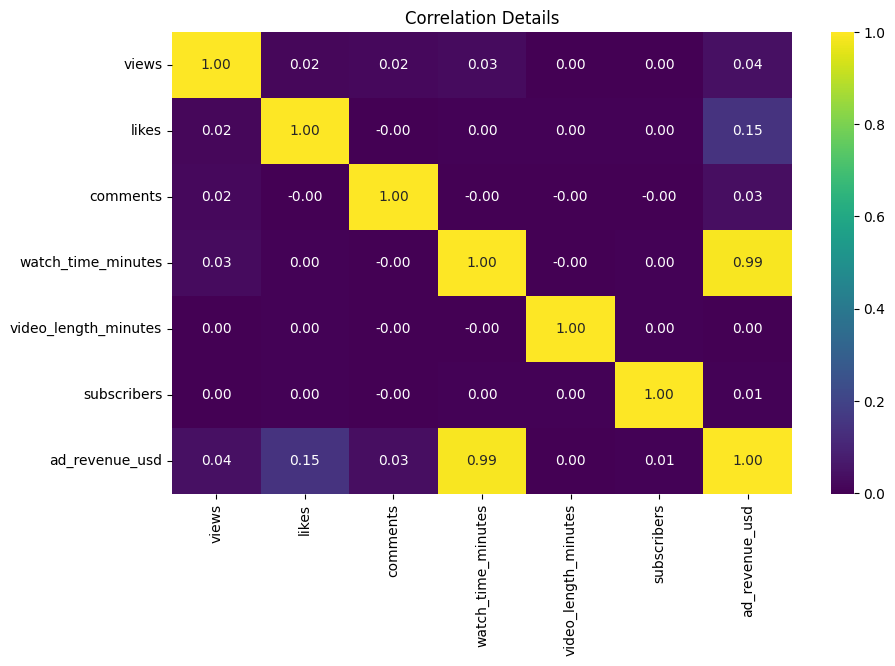

In [18]:
# Select only numeric columns:Watch time minutes vs Ad revenue (0.99)

#Extremely strong positive correlation.

#More watch time → almost always higher ad revenue.

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Details")
plt.show()

In [19]:
#Filling null values:
df["likes"].fillna(df["likes"].median(), inplace=True)
df["comments"].fillna(df["comments"].median(), inplace=True)

df["watch_time_minutes"].fillna(df["watch_time_minutes"].mean(), inplace=True)

C:\Users\Sri Advikam\AppData\Local\Temp\ipykernel_14660\4171959153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["likes"].fillna(df["likes"].median(), inplace=True)
C:\Users\Sri Advikam\AppData\Local\Temp\ipykernel_14660\4171959153.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

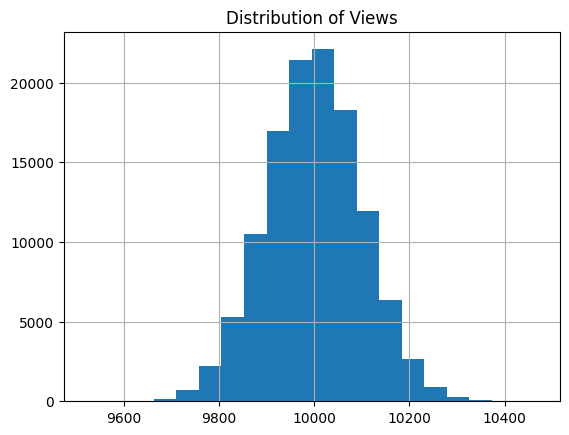

In [20]:
# Univariate - numerical:Bell-shaped distribution

#The histogram looks very much like a normal distribution, centered around 10,000 views.

#Most of the videos have views close to 10,000.

df["views"].hist(bins=20)
plt.title("Distribution of Views")
plt.show()

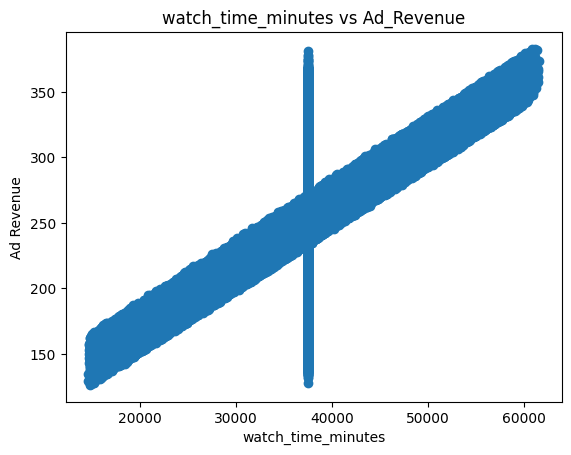

In [21]:
# Ad revenue compared with watch_time_minutes:
plt.scatter(df["watch_time_minutes"], df["ad_revenue_usd"])
plt.xlabel("watch_time_minutes")
plt.ylabel("Ad Revenue")
plt.title("watch_time_minutes vs Ad_Revenue")
plt.show()

In [22]:
#Machine learning model-Linear Regression:

x = df.drop("ad_revenue_usd", axis=1)
y = df["ad_revenue_usd"]

In [23]:
x

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country
0,9936,1221.0,320.0,26497.21418,2.862137,228086,Entertainment,TV,IN
1,10017,642.0,346.0,15209.74744,23.738069,736015,Gaming,Tablet,CA
2,10097,1979.0,187.0,57332.65850,26.200634,240534,Education,TV,CA
3,10034,1191.0,242.0,31334.51777,11.770340,434482,Entertainment,Mobile,UK
4,9889,1858.0,477.0,15665.66643,6.635854,42030,Education,Mobile,CA
...,...,...,...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.70489,25.490195,210818,Education,Tablet,US
122396,10128,1709.0,63.0,57563.70304,16.229133,878860,Music,Desktop,UK
122397,10267,700.0,274.0,27549.71466,23.822365,576756,Tech,Tablet,CA
122398,10240,1616.0,106.0,56967.38438,7.753099,585138,Music,Mobile,UK


In [24]:
y

0         203.178237
1         140.880508
2         360.134007
3         224.638261
4         165.514388
             ...    
122395    280.986396
122396    354.612981
122397    203.643106
122398    351.525811
122399    253.842824
Name: ad_revenue_usd, Length: 120000, dtype: float64

In [25]:
x.isnull().sum()

views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
dtype: int64

In [26]:
x.shape,y.shape

((120000, 9), (120000,))

In [27]:
# Training and Testing Data Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
# Checking the Data split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((96000, 9), (24000, 9), (96000,), (24000,))

In [ ]:
x.columns


Index(['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country'],
      dtype='object')

In [30]:
#Models Types:

pipelines = {
    
    "Linear Regression": Pipeline([
        ("preprocessor",preprocessor),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
         ("preprocessor",preprocessor),
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),
    "Lasso Regression": Pipeline([

         ("preprocessor",preprocessor),
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.01))
    ]),
    "Decision Tree": Pipeline([
         ("preprocessor",preprocessor),
        ("model", DecisionTreeRegressor(max_depth=5, random_state=42))
    ]),
    "Random Forest": Pipeline([
         ("preprocessor",preprocessor),
        ("model", RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
         ("preprocessor",preprocessor),
        ("model", GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])
}

results = {}
for name, pipe in pipelines.items():
    # Fit
    pipe.fit(x_train,y_train)
    
    # Predict
    y_pred = pipe.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) 
    # Evaluate
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mean_absolute_error(y_test, y_pred),
        
    }


pd.DataFrame(results).T


,R2,MSE,RMSE,MAE
Linear Regression,0.952580,181.690093,13.479247,3.107089
Ridge Regression,0.952580,181.690140,13.479248,3.107114
Lasso Regression,0.952584,181.674563,13.478671,3.095489
Decision Tree,0.941960,222.377064,14.912312,7.664391
Random Forest,0.949810,192.302298,13.867310,3.659472
Gradient Boosting,0.952277,182.850906,13.522237,3.661088


In [50]:
#Best_Model:

best_model=pipelines["Lasso Regression"]

In [51]:
import pickle
with open("final_model.pkl", "wb") as f:
    pickle.dump(best_model,f)

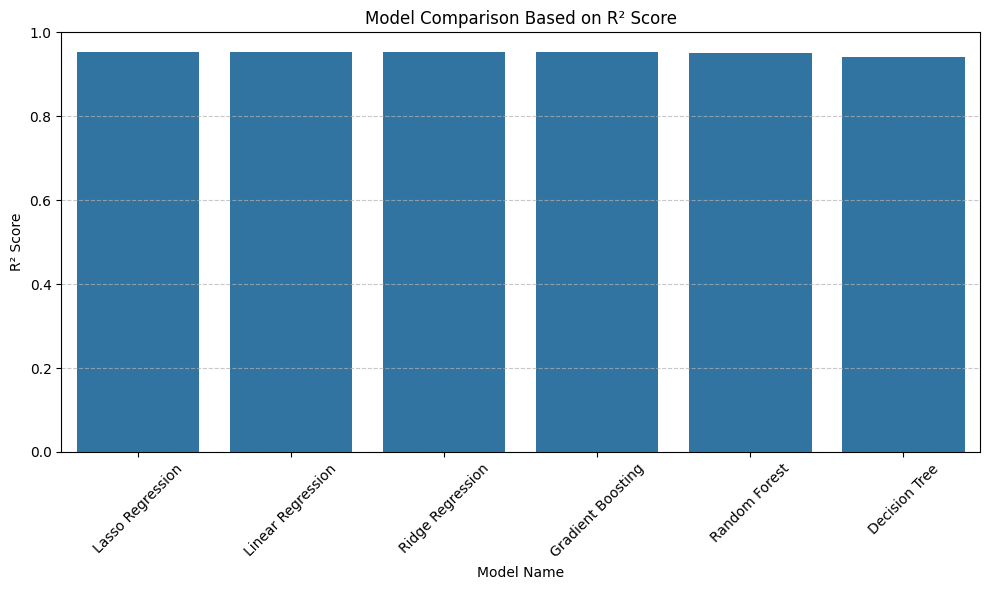

In [52]:
results_df = pd.DataFrame(results).T  # Convert results to DataFrame
results_df = results_df.sort_values(by="R2", ascending=False)

# Plot R² scores for each model
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R2", data=results_df)
plt.title("Model Comparison Based on R² Score")
plt.ylabel("R² Score")
plt.xlabel("Model Name")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()